# 1. Dependencies

In [16]:
!pip install torch torchvision torchaudio
!pip install stable-baselines3[extra] protobuf==3.20.*
!pip install mss pydirectinput pytesseract

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#chrome://dino/

In [21]:
# Screen capture faster than OpenCV
from mss import mss
# Sending commands (wasd)
import pydirectinput
# Frame processing
import cv2
# Transforming
import numpy as np
# OCR for 'game over' extraction
# OCR: Optical Character Recognition
import pytesseract
# Visualize captured frames
from matplotlib import pyplot as plt
import time
# Env components
from gym import Env
from gym.spaces import Box, Discrete

# 2. Environment

## 2.1 Create Environment

In [63]:
class WebGame(Env):
    
    # Setup env, action, and obs shapes
    def __init__(self):
        # Subclass model
        super().__init__()
        # Spaces
        # Box is a freeform shape (in our instance an array)
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        # Extraction parameters for the game
        self.cap = mss()
        self.game_location = {'top':300, 'left':0, 'width':600, 'height':500}
        self.done_location = {'top':405, 'left':630, 'width':660, 'height':70}
    
    def step(self, action):
        # Action key(s): 0 for Spacebar (up), 1 for Duck (down), 2 for No Action (no operation)
        action_map = {
            0:'space',
            1:'down',
            2:'no_op'
        }
        
        if action != 2:
            pydirectinput.press(action_map[action])
            
        # Checking if game is done
        done, done_cap = self.get_done()
        # Get newest observation
        new_observation = self.get_observation()
        # Reward system: Dino gets a point for every frame that he is alive
        reward = 1
        # Info dictionary
        info = {}
        
        return new_observation, reward, done, info
    
    def render(self):
        pass
    
    # Restart the game
    def reset(self):
        pass
    
    # Closes the obs
    def close(self):
        pass
    
    # Capture a region of the game that we can use
    def get_observation(self):
        # Get screen capture of the game
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3]
        # Grayscale
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        # Resize
        resized = cv2.resize(gray, (100,83))
        # Add channels first to match what stable baseline parameters are
        channel = np.reshape(resized, (1,83,100))
        
        return channel
    
    # Get the 'game over' text that is displayed on the screen using OCR
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        # Valid done text
        done_strings = ['GAME', 'GAHE']
        
        # Apply OCR
        done = False
        # Grabs the first four letters
        res = pytesseract.image_to_string(done_cap)[:4]
        
        if res in done_strings:
            done = True
        
        return done, done_cap

In [64]:
env = WebGame()
#env.action_space.sample()

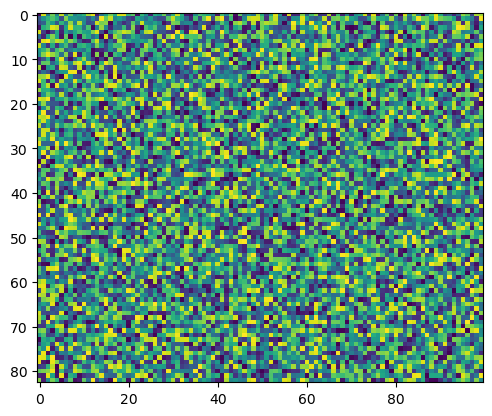

In [65]:
plt.imshow(env.observation_space.sample()[0])

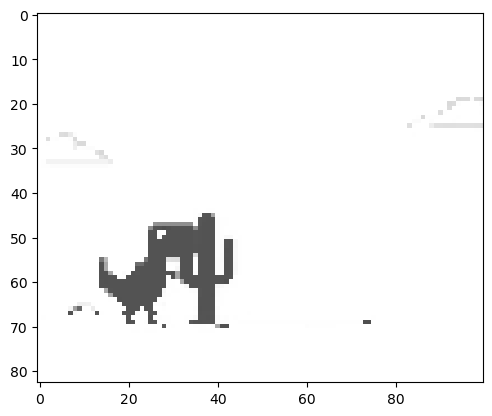

In [66]:
plt.imshow(cv2.cvtColor(env.get_observation()[0], cv2.COLOR_BGR2RGB))

In [68]:
done, done_cap = env.get_done()

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
plt.imshow(done_cap)

In [56]:
env.get_done().shape

(70, 660, 3)

## 2.2 Test Environment

# 3. Train the Model

## 3.1 Callback

## 3.2 DQN and Train

# 4. Test the Model